In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
print(nlp.pipe_names)


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
nlp.add_pipe("token_splitter")
nlp.add_pipe("sentencizer")
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'token_splitter', 'sentencizer']


Introduire un exemple de texte et efectuer un preprocessing

In [ ]:
txt=nlp("The Massachusetts Institute of Technology (MIT) is a private land-grant research university in Cambridge, Massachusetts. Established in 1861, MIT has played a significant role in the development of many areas of modern technology and science.Founded in response to the increasing industrialization of the United States, MIT adopted a European polytechnic university model and stressed laboratory instruction in applied science and engineering. MIT is one of three private land grant universities in the United States, the others being Cornell University and Tuskegee University. The institute has an urban campus that extends more than a mile (1.6 km) alongside the Charles River, and encompasses a number of major off-campus facilities such as the MIT Lincoln Laboratory, the Bates Center, and the Haystack Observatory, as well as affiliated laboratories such as the Broad and Whitehead Institutes.")
print(list(txt.sents)[0])
print(list(txt.sents)[1])
print(list(txt.sents)[2])

print(txt[0],txt[1],txt[2])


The Massachusetts Institute of Technology (MIT) is a private land-grant research university in Cambridge, Massachusetts.
Established in 1861, MIT has played a significant role in the development of many areas of modern technology and science.
Founded in response to the increasing industrialization of the United States, MIT adopted a European polytechnic university model and stressed laboratory instruction in applied science and engineering.
The Massachusetts Institute


Afficer les vocabulaire du texte


In [ ]:
for word in txt[0 : 3]:
    lexeme=txt.vocab[word.text]
    print(lexeme.text,lexeme.shape_,lexeme.prefix_,lexeme.suffix_,lexeme.is_alpha,lexeme.is_digit,lexeme.lang_)




The Xxx T The True False en
Massachusetts Xxxxx M tts True False en
Institute Xxxxx I ute True False en


In [ ]:
for word in txt[0:20]:
    print(f'{word.text:{15}},  {word.lemma_:{15}} {word.pos_:{8}} {word.tag_:{8}} {spacy.explain(word.pos_):20}{word.dep_:8}')



The            ,  the             DET      DT       determiner          det     
Massachusetts  ,  Massachusetts   PROPN    NNP      proper noun         compound
Institute      ,  Institute       PROPN    NNP      proper noun         nsubj   
of             ,  of              ADP      IN       adposition          prep    
Technology     ,  Technology      PROPN    NNP      proper noun         pobj    
(              ,  (               PUNCT    -LRB-    punctuation         punct   
MIT            ,  MIT             PROPN    NNP      proper noun         appos   
)              ,  )               PUNCT    -RRB-    punctuation         punct   
is             ,  be              AUX      VBZ      auxiliary           ROOT    
a              ,  a               DET      DT       determiner          det     
private        ,  private         ADJ      JJ       adjective           amod    
land           ,  land            NOUN     NN       noun                compound
-              ,  -         

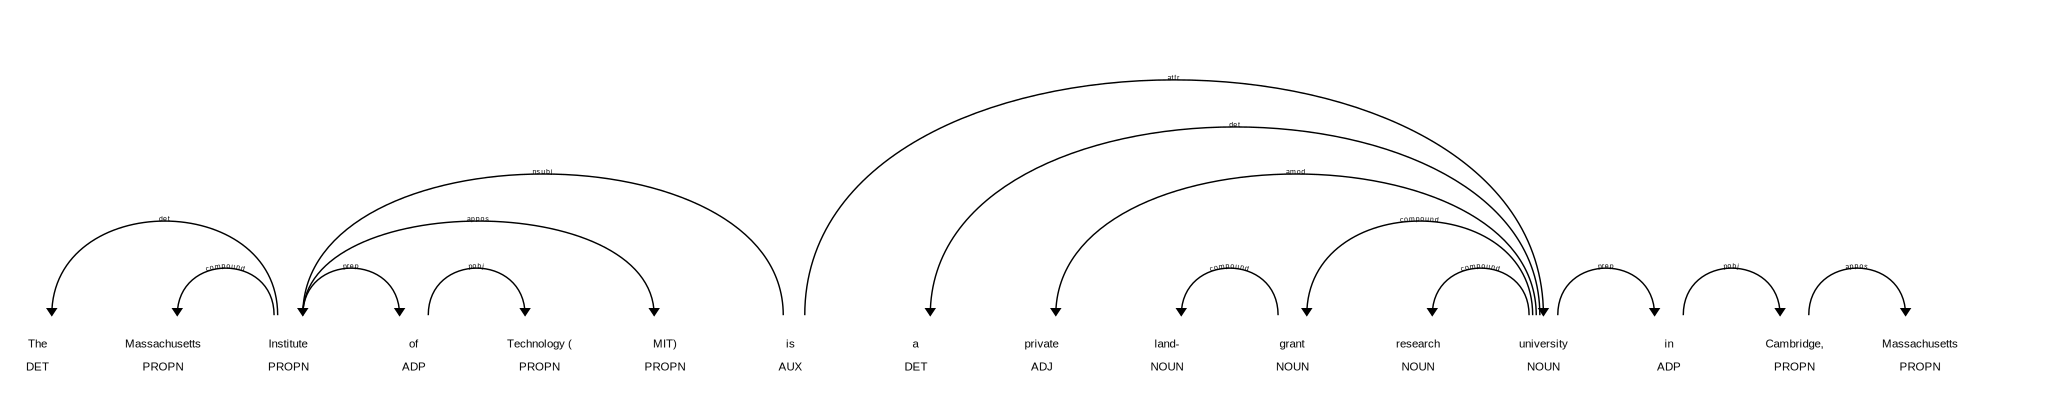

In [ ]:
import spacy
from spacy import displacy

span=txt[0:20]
deptree=displacy.render(span,style="dep")
from IPython.core.display import SVG
SVG(deptree)

In [ ]:
for chunk in span.noun_chunks:
  print(f'{chunk.text:{50}} {chunk.root.text:{15}} {chunk.root.dep_:{8}} {chunk.root.head.text:{15}}')

The Massachusetts Institute                        Institute       nsubj    is             
Technology                                         Technology      pobj     of             
MIT                                                MIT             appos    Institute      
a private land-grant research university           university      attr     is             
Cambridge                                          Cambridge       pobj     in             
Massachusetts                                      Massachusetts   appos    Cambridge      


In [ ]:
from spacy.matcher import Matcher
matcher=Matcher(nlp.vocab)
pattern=[{'POS':'PROPN','OP': '+','IS_PUNCT':False}]
matcher.add("ORG1",[pattern])
matches=matcher(txt)
print(len(matches))
for match in matches[:10]:
  print(match,txt[match[1]:match[2]])

matcher2=Matcher(nlp.vocab)
matcher2.add("ORG2",[pattern],greedy='LONGEST')
matches=matcher2(txt)
print(len(matches))
for match in matches[:20]:
  print(match,txt[match[1]:match[2]])



41
(6582767286935887348, 1, 2) Massachusetts
(6582767286935887348, 1, 3) Massachusetts Institute
(6582767286935887348, 2, 3) Institute
(6582767286935887348, 4, 5) Technology
(6582767286935887348, 6, 7) MIT
(6582767286935887348, 17, 18) Cambridge
(6582767286935887348, 19, 20) Massachusetts
(6582767286935887348, 25, 26) MIT
(6582767286935887348, 52, 53) United
(6582767286935887348, 52, 54) United States
18
(2631470707395093984, 129, 132) MIT Lincoln Laboratory
(2631470707395093984, 1, 3) Massachusetts Institute
(2631470707395093984, 52, 54) United States
(2631470707395093984, 83, 85) United States
(2631470707395093984, 89, 91) Cornell University
(2631470707395093984, 92, 94) Tuskegee University
(2631470707395093984, 113, 115) Charles River
(2631470707395093984, 134, 136) Bates Center
(2631470707395093984, 139, 141) Haystack Observatory
(2631470707395093984, 152, 154) Whitehead Institutes
(2631470707395093984, 4, 5) Technology
(2631470707395093984, 6, 7) MIT
(2631470707395093984, 17, 18) 

In [ ]:
for ent in span.ents:
  print(f'{ent.text:{50}} {ent.label_:{15}} {spacy.explain(ent.label_)}')
SVG(displacy.render(span,style="ent"))

The Massachusetts Institute of Technology          ORG             Companies, agencies, institutions, etc.
MIT                                                ORG             Companies, agencies, institutions, etc.
Cambridge                                          GPE             Countries, cities, states
Massachusetts                                      GPE             Countries, cities, states


In [ ]:
import nltk
from nltk import download
download('punkt')
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.tag import StanfordNERTagger  # Corrected the import statement


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

ner3 = StanfordNERTagger('/content/drive/MyDrive/english.all.3class.distsim.crf.ser.gz', path_to_jar='/content/drive/MyDrive/stanford-ner-4.2.0.jar')
sentences = sent_tokenize(text.text)
tokenized_sentences =[word_tokenize(sentence) for sentence in sentences]
for sent in tokenized_sentences[:3]:
  print(sent)
  ner3Out= ner3.tag(sent)
  print(ner3Out)



['The', 'Massachusetts', 'Institute', 'of', 'Technology', '(', 'MIT', ')', 'is', 'a', 'private', 'land-grant', 'research', 'university', 'in', 'Cambridge', ',', 'Massachusetts', '.']
[('The', 'O'), ('Massachusetts', 'ORGANIZATION'), ('Institute', 'ORGANIZATION'), ('of', 'ORGANIZATION'), ('Technology', 'ORGANIZATION'), ('(', 'O'), ('MIT', 'O'), (')', 'O'), ('is', 'O'), ('a', 'O'), ('private', 'O'), ('land-grant', 'O'), ('research', 'O'), ('university', 'O'), ('in', 'O'), ('Cambridge', 'LOCATION'), (',', 'O'), ('Massachusetts', 'LOCATION'), ('.', 'O')]
['Established', 'in', '1861', ',', 'MIT', 'has', 'played', 'a', 'significant', 'role', 'in', 'the', 'development', 'of', 'many', 'areas', 'of', 'modern', 'technology', 'and', 'science.Founded', 'in', 'response', 'to', 'the', 'increasing', 'industrialization', 'of', 'the', 'United', 'States', ',', 'MIT', 'adopted', 'a', 'European', 'polytechnic', 'university', 'model', 'and', 'stressed', 'laboratory', 'instruction', 'in', 'applied', 'scienc

In [ ]:

ner3 = StanfordNERTagger('/content/drive/MyDrive/english.muc.7class.distsim.crf.ser.gz', path_to_jar='/content/drive/MyDrive/stanford-ner-4.2.0.jar')
sentences = sent_tokenize(txt.text)
tokenized_sentences =[word_tokenize(sentence) for sentence in sentences]
for sent in tokenized_sentences[:3]:
  print(sent)
  ner3Out= ner3.tag(sent)
  print(ner3Out)

['The', 'Massachusetts', 'Institute', 'of', 'Technology', '(', 'MIT', ')', 'is', 'a', 'private', 'land-grant', 'research', 'university', 'in', 'Cambridge', ',', 'Massachusetts', '.']
[('The', 'O'), ('Massachusetts', 'ORGANIZATION'), ('Institute', 'ORGANIZATION'), ('of', 'ORGANIZATION'), ('Technology', 'ORGANIZATION'), ('(', 'ORGANIZATION'), ('MIT', 'ORGANIZATION'), (')', 'ORGANIZATION'), ('is', 'O'), ('a', 'O'), ('private', 'O'), ('land-grant', 'O'), ('research', 'O'), ('university', 'O'), ('in', 'O'), ('Cambridge', 'LOCATION'), (',', 'O'), ('Massachusetts', 'LOCATION'), ('.', 'O')]
['Established', 'in', '1861', ',', 'MIT', 'has', 'played', 'a', 'significant', 'role', 'in', 'the', 'development', 'of', 'many', 'areas', 'of', 'modern', 'technology', 'and', 'science.Founded', 'in', 'response', 'to', 'the', 'increasing', 'industrialization', 'of', 'the', 'United', 'States', ',', 'MIT', 'adopted', 'a', 'European', 'polytechnic', 'university', 'model', 'and', 'stressed', 'laboratory', 'instr

In [ ]:
ner3 = StanfordNERTagger('/content/drive/MyDrive/english.conll.4class.distsim.crf.ser.gz', path_to_jar='/content/drive/MyDrive/stanford-ner-4.2.0.jar')
sentences = sent_tokenize(txt.text)
tokenized_sentences =[word_tokenize(sentence) for sentence in sentences]
for sent in tokenized_sentences[:3]:
  print(sent)
  ner3Out= ner3.tag(sent)
  print(ner3Out)

['The', 'Massachusetts', 'Institute', 'of', 'Technology', '(', 'MIT', ')', 'is', 'a', 'private', 'land-grant', 'research', 'university', 'in', 'Cambridge', ',', 'Massachusetts', '.']
[('The', 'O'), ('Massachusetts', 'ORGANIZATION'), ('Institute', 'ORGANIZATION'), ('of', 'ORGANIZATION'), ('Technology', 'ORGANIZATION'), ('(', 'O'), ('MIT', 'ORGANIZATION'), (')', 'O'), ('is', 'O'), ('a', 'O'), ('private', 'O'), ('land-grant', 'O'), ('research', 'O'), ('university', 'O'), ('in', 'O'), ('Cambridge', 'LOCATION'), (',', 'O'), ('Massachusetts', 'LOCATION'), ('.', 'O')]
['Established', 'in', '1861', ',', 'MIT', 'has', 'played', 'a', 'significant', 'role', 'in', 'the', 'development', 'of', 'many', 'areas', 'of', 'modern', 'technology', 'and', 'science.Founded', 'in', 'response', 'to', 'the', 'increasing', 'industrialization', 'of', 'the', 'United', 'States', ',', 'MIT', 'adopted', 'a', 'European', 'polytechnic', 'university', 'model', 'and', 'stressed', 'laboratory', 'instruction', 'in', 'applie